In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl
from matplotlib.pyplot import *

In [2]:
Lmax = 4096
lmax = 2048
l = np.linspace(0,lmax,lmax+1)
L = np.linspace(0,Lmax,Lmax+1)
pla, fla, rla = prjlib.analysis_init(t='la',freq='coadd',lmax=Lmax)
pid, fid, rid = prjlib.analysis_init(t='id',freq='145',ntype='cv')
psa, fsa, rsa = prjlib.analysis_init(t='sa',freq='coadd',lmax=lmax)
pco, fco, rco = prjlib.analysis_init(t='co',freq='coadd',lmax=lmax)
lcut = 2048
vmin, vmax = -1e-6, 1e-6
#vmin, vmax = -2e-7, 2e-7

In [3]:
# load windows
Wsa, wsa2, __, Msa, msa2, __, __, __ = prjlib.window(fsa.cmb.mask)
Wla, wla2, __, Mla, mla2, __, __, __ = prjlib.window(fla.cmb.mask)
Mla = hp.pixelfunc.ud_grade(Mla,psa.nside)
mco2 = np.average(Mla)+np.average(Msa)-np.average(Mla*Msa)
print(mla2,mco2)

0.039673498593158225 0.01720146136530704 0.34380340576171875 0.34380340576171875 0.0816702089724941 0.039673498593158225
0.046519878502273154 0.00878600382491057 0.5752538045247396 0.5752538045247396 0.14110664609279655 0.046519878502273154
0.5752538045247396 0.577020009358724


Filtered maps

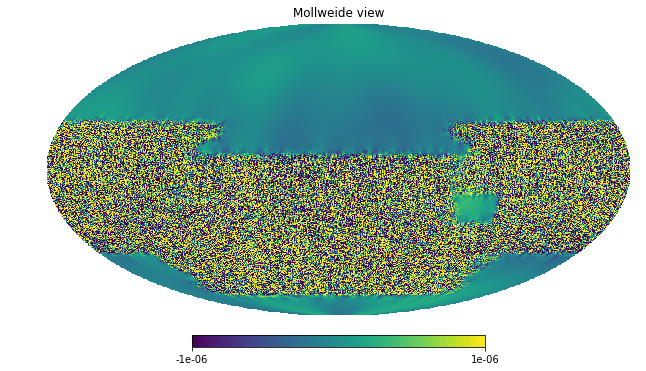

In [4]:
Ealm0 = pickle.load(open(fco.cmb.walm['E'][99],"rb"))
Balm0 = pickle.load(open(fco.cmb.walm['B'][99],"rb"))
Q, U = curvedsky.utils.hp_alm2map_spin(psa.npix,lmax,lmax,2,Ealm0,0*Ealm0)
hp.mollview(Q,min=vmin,max=vmax)

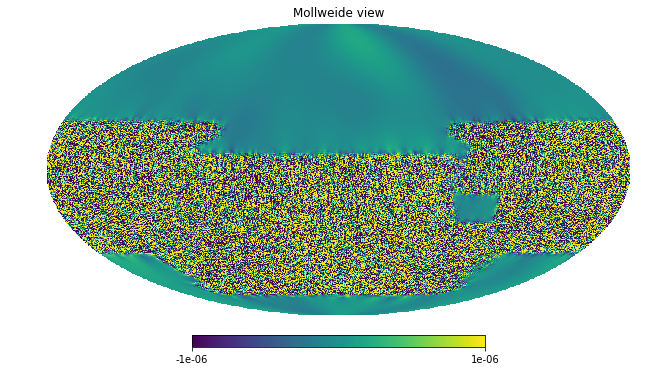

In [5]:
Ealm1 = pickle.load(open(fco.cmb.walm['E'][1],"rb"))
Balm1 = pickle.load(open(fco.cmb.walm['B'][1],"rb"))
Q, U = curvedsky.utils.hp_alm2map_spin(psa.npix,lmax,lmax,2,Ealm1,0*Ealm1)
hp.mollview(Q,min=vmin,max=vmax)

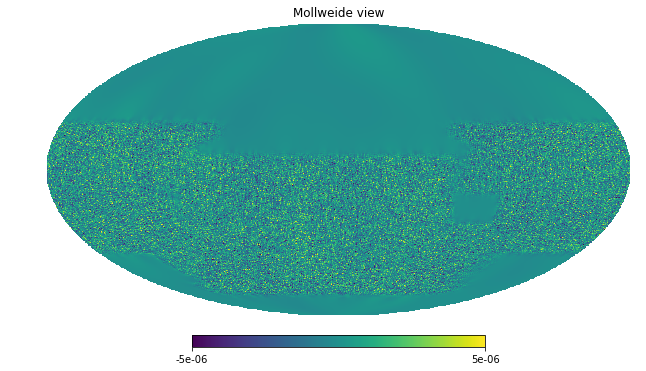

In [18]:
Ealm = pickle.load(open(fla.cmb.walm['E'][1],"rb"))
Balm = pickle.load(open(fla.cmb.walm['B'][1],"rb"))
Q, U = curvedsky.utils.hp_alm2map_spin(psa.npix,Lmax,Lmax,2,Ealm,0*Ealm)
hp.mollview(Q,min=vmin,max=vmax)

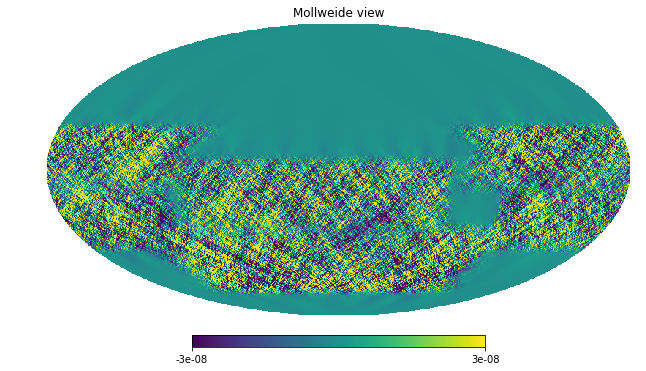

In [19]:
Q, U = curvedsky.utils.hp_alm2map_spin(psa.npix,Lmax,Lmax,2,0*Ealm,Balm)
hp.mollview(Q,min=vmin*0.03,max=vmax*0.03)

Power spectrum

In [7]:
p0, f0, __ = prjlib.analysis_init(t='la',freq='coadd')
TT, EE, BB = np.loadtxt(f0.cmb.scl['s'],unpack=True,usecols=(1,2,3))[:,:Lmax+1]
TN, EN, BN = np.loadtxt(f0.cmb.scl['n'],unpack=True,usecols=(1,2,3))[:,:Lmax+1]
WT = TT/(TT+TN+1e-30)
WE = EE/(EE+EN+1e-30)
WB = BB/(BB+BN+1e-30)

In [8]:
Talm = pickle.load(open(fla.cmb.ialm['T'][1],"rb"))
tt0 = curvedsky.utils.alm2cl(Lmax,Talm)/wla2

In [9]:
ee0 = curvedsky.utils.alm2cl(lmax,Ealm0)
ee1 = curvedsky.utils.alm2cl(lmax,Ealm1)
ee2 = curvedsky.utils.alm2cl(Lmax,Ealm)
bb0 = curvedsky.utils.alm2cl(lmax,Balm0)
bb1 = curvedsky.utils.alm2cl(lmax,Balm1)
bb2 = curvedsky.utils.alm2cl(Lmax,Balm)

In [10]:
ealm = pickle.load(open(fid.cmb.oalm['E'][1],"rb"))[:lmax+1,:lmax+1]
eex = curvedsky.utils.alm2cl(lmax,Ealm1,ealm)
eei = curvedsky.utils.alm2cl(lmax,ealm)

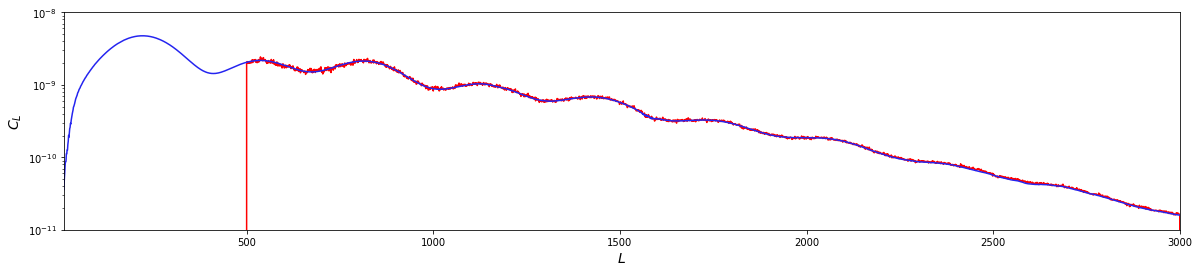

In [11]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=3000,ylog=True,ymin=1e-11,ymax=1e-8)
plot(L,L**2*tt0*TT**2,color='r')
plot(L,L**2*WT*rla.lcl[0,:])
#plot(L,L**2*TT)
#plot(L,L**2*rla.lcl[0,:])

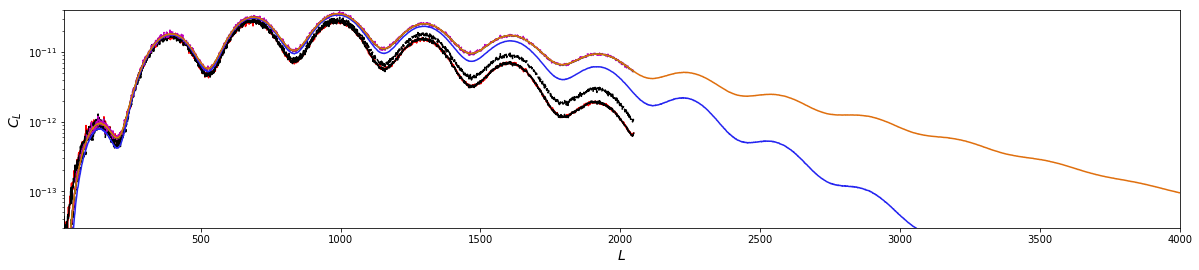

In [12]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-14,ymax=4e-11,ylog=True)
plot(l,l**2*ee0/mco2,color='r')
plot(l,l**2*ee1/mco2,color='k')
plot(l,l**2*eex/mco2,'k--')
plot(l,l**2*eei,'m--')
plot(L,L**2*ee2/mla2*rla.lcl[1,:]**2,color='m')
plot(l,l**2*rco.lcl[1,:],color='g')
plot(L,L**2*WE*EE)
plot(L,L**2*EE)

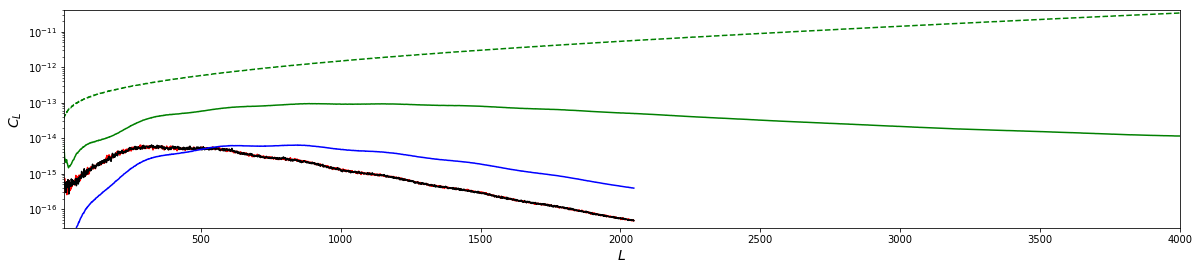

In [13]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-17,ymax=4e-11,ylog=True)
plot(l,l**2*bb0/mco2,color='r')
plot(l,l**2*bb1/mco2,color='k')
plot(L,L**2*bb2/mla2*rla.lcl[2,:]**2,color='m')
plot(L,L**2*BB,'g-')
plot(L,L**2*BN,'g--')
plot(l,l**2*WB[:lmax+1]*rco.lcl[2,:],color='b')

In [14]:
simn = 37
oe = np.zeros((simn,lmax+1))
ob = np.zeros((simn,lmax+1))
for i in range(1,1+simn):
    tt, ee, bb, tn, en, bn = np.loadtxt(f0.cmb.cl[i],unpack=True,usecols=(1,2,3,5,6,7))[:,:lmax+1]
    oe[i-1,:] = ee+en
    ob[i-1,:] = bb+bn
me = np.mean(oe,axis=0)
mb = np.mean(ob,axis=0)
ve = np.std(oe,axis=0)+1e-40
vb = np.std(ob,axis=0)+1e-40
print(np.sqrt(np.sum(me**2/ve**2)),np.sqrt(np.sum(mb**2/vb**2)))

KeyError: 1

In [ ]:
simn = 37
oe = np.zeros((simn,lmax+1))
ob = np.zeros((simn,lmax+1))
for i in range(1,1+simn):
    Ealmi = pickle.load(open(fla.cmb.ialm['E'][i],"rb"))[:lmax+1,:lmax+1]
    Balmi = pickle.load(open(fla.cmb.ialm['B'][i],"rb"))[:lmax+1,:lmax+1]
    oe[i-1,:] = curvedsky.utils.alm2cl(lmax,Ealmi)*EE[:lmax+1]**2
    ob[i-1,:] = curvedsky.utils.alm2cl(lmax,Balmi)*BB[:lmax+1]**2
me = np.mean(oe,axis=0)
mb = np.mean(ob,axis=0)
ve = np.std(oe,axis=0)+1e-40
vb = np.std(ob,axis=0)+1e-40
print(np.sqrt(np.sum(me**2/ve**2)),np.sqrt(np.sum(mb**2/vb**2)))